In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

In [ ]:
#There 42 000 samples with labels

In [ ]:
#SVM Trial 1
#data = pd.read_csv('train.csv')
#test = pd.read_csv('test.csv')
data = pd.read_csv('train 4.csv')

In [ ]:
# Let's shuffle the dataset 
#data = data.values
#np.random.seed(0) # make sure the shuffle happens same way every time we run the code
#np.random.shuffle(data)


In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop('label', axis=1)
y = data['label']
#X = data[:,1:]
#y = data[:,0]

X = X/255.0

#test = test/255

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_vald, y_train, y_vald = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

#X = X.values
#y = y.values

#np.random.seed(0) # make sure the shuffle happens same way every time we run the code
#np.random.shuffle(X)
#np.random.shuffle(y)


In [ ]:
#from sklearn.preprocessing import StandardScaler

#ss = StandardScaler()
#X_train = ss.fit_transform(X_train)
#X_vald = ss.fit_transform(X_vald)
#X_test = ss.fit_transform(X_test)

#X_train

In [ ]:
#y_train = y_train.values
#y_train
#y_vald = y_vald.values
y_vald = np.array(y_vald)
y_train = np.array(y_train)
y_vald

array([1, 9, 0, ..., 0, 9, 4])

In [ ]:
#from sklearn.model_selection import train_test_split
# Split the dataset into training and testing
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# Then we can split the training dataset into training and validation
#X_train, X_vald, y_train, y_vald = train_test_split(X_train, y_train, test_size = 0.25)

print(X_train.shape)
print(X_vald.shape)
print(X_test.shape)

(25200, 784)
(8400, 784)
(8400, 784)


In [ ]:
from keras.utils.np_utils import to_categorical

ky_train = to_categorical(y_train, num_classes=10)
#y_test = to_categorical(y_test, num_classes=10)
ky_vald = to_categorical(y_vald, num_classes=10)

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
score = model.score(X_test,y_test)
score

0.9669047619047619

In [ ]:
#test = test.values

In [ ]:
test_predictions = model.predict(test)


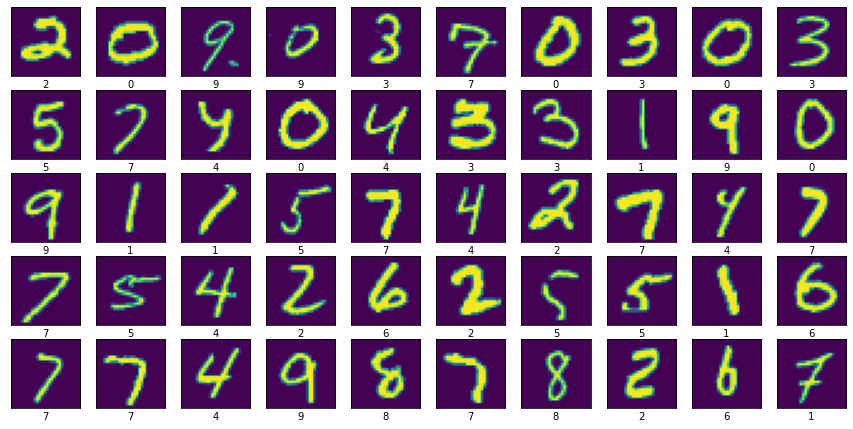

In [ ]:
test = test.to_numpy().reshape(-1,28,28)

plt.figure(figsize = (15,15))
for i in range(50):
    plt.subplot(10,10,i+1)
    plt.imshow(test[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(test_predictions[i])

In [ ]:
from PIL import Image



In [ ]:
kVals = np.arange(1,21)
scores = []
Ks = []
for k in kVals:
    
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    
    # evaluate the model and update the accuracies list
    score = model.score(X_vald, y_vald)
    scores.append(score)
    Ks.append(k)
    #print("k=%d, accuracy=%.2f%%" % (k, score * 100))


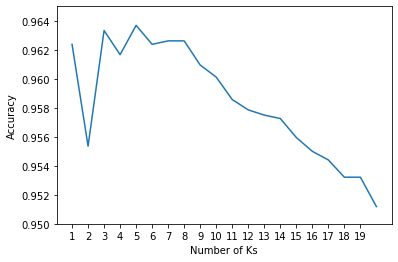

In [ ]:
plt.plot(Ks, scores)
plt.xlabel('Number of Ks')
plt.ylabel('Accuracy')
plt.ylim([0.95, 0.965])
plt.xticks(range(1, 20))
plt.show()


In [ ]:
scores

[0.9623809523809523,
 0.9553571428571429,
 0.9633333333333334,
 0.9616666666666667,
 0.9636904761904762,
 0.9623809523809523,
 0.9626190476190476,
 0.9626190476190476,
 0.960952380952381,
 0.9601190476190476,
 0.9585714285714285,
 0.9578571428571429,
 0.9575,
 0.9572619047619048,
 0.955952380952381,
 0.955,
 0.9544047619047619,
 0.9532142857142857,
 0.9532142857142857,
 0.9511904761904761]

In [ ]:
from sklearn.metrics import classification_report

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
predictions = model.predict(X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       813
           1       0.96      0.99      0.98       961
           2       0.99      0.96      0.98       860
           3       0.95      0.97      0.96       863
           4       0.97      0.95      0.96       827
           5       0.96      0.97      0.96       756
           6       0.97      0.99      0.98       841
           7       0.95      0.97      0.96       899
           8       0.99      0.90      0.94       768
           9       0.94      0.94      0.94       812

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



In [ ]:
from sklearn.model_selection import GridSearchCV
cv = [(slice(None), slice(None))]

#grid_params = {'n_neighbors':np.arange(1,16), 'weights':['uniform','distance'], 'metric':['euclidean','manhattan','minkowski']}
#grid_params = {'n_neighbors':np.arange(1,16),'metric':['euclidean','manhattan','minkowski']}
grid_params = {'n_neighbors':np.arange(1,6),'metric':['euclidean','manhattan']}
#gs = GridSearchCV(KNeighborsClassifier(),grid_params,verbose = 1,cv=3,scoring='accuracy', refit=True)
gs = GridSearchCV(KNeighborsClassifier(),grid_params,verbose = 1,cv=cv,scoring='accuracy')
gs_results = gs.fit(X_train,y_train)


Fitting 1 folds for each of 10 candidates, totalling 10 fits


In [ ]:
#Took almost 40 minutes to train

print('Best Score: %s' % gs_results.best_score_)
print('Best Hyperparameters: %s' % gs_results.best_params_)
print('Best Hyperparameters index: %s' % gs_results.best_index_)

Best Score: 1.0
Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 1}
Best Hyperparameters index: 0


In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
predictions = model.predict(X_test)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, predictions))  

0.9644047619047619


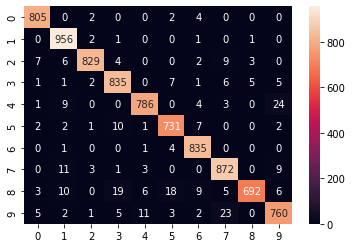

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(y_test, predictions)
sns.heatmap(confusion_mtx, annot=True, fmt='d')

In [ ]:
grid_params2 = {'n_neighbors':np.arange(1,6),'metric':['euclidean','manhattan','minkowski']}
#gs = GridSearchCV(KNeighborsClassifier(),grid_params,verbose = 1,cv=3,scoring='accuracy', refit=True)
gs2 = GridSearchCV(KNeighborsClassifier(),grid_params2,verbose = 1,cv=3,scoring='accuracy')
gs2_results = gs2.fit(X_train,y_train)


Fitting 3 folds for each of 15 candidates, totalling 45 fits


In [ ]:
print('Best Score: %s' % gs2_results.best_score_)
print('Best Hyperparameters: %s' % gs2_results.best_params_)
print('Best Hyperparameters index: %s' % gs2_results.best_index_)

Best Score: 0.9586111111111112
Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 1}
Best Hyperparameters index: 0


In [ ]:
from sklearn.model_selection import StratifiedKFold

grid_params3 = {'n_neighbors':np.arange(1,7),'metric':['euclidean','manhattan','minkowski']}
kfold = StratifiedKFold(n_splits = 5)
#gs = GridSearchCV(KNeighborsClassifier(),grid_params,verbose = 1,cv=3,scoring='accuracy', refit=True)
gs2 = GridSearchCV(KNeighborsClassifier(),grid_params2,verbose = 1,cv= kfold,scoring='accuracy')
gs2_results = gs2.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


In [ ]:
print('Best Score: %s' % gs2_results.best_score_)
print('Best Hyperparameters: %s' % gs2_results.best_params_)
print('Best Hyperparameters index: %s' % gs2_results.best_index_)

Best Score: 0.9603571428571429
Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 3}
Best Hyperparameters index: 2
